Text(0.5, 1.0, 'Valor del ETF 5 a lo largo del mes de abril')

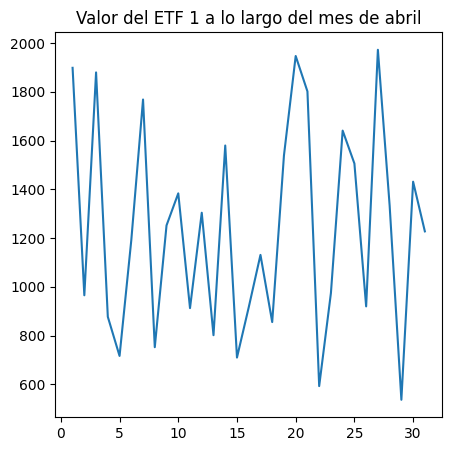

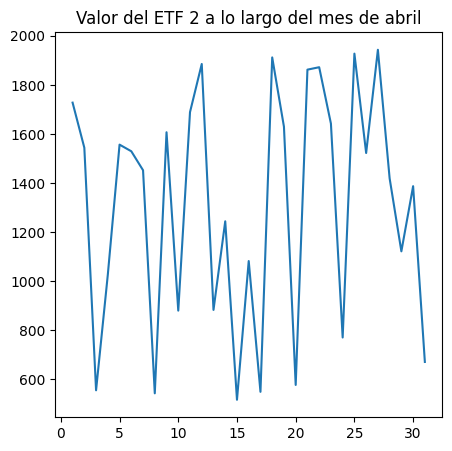

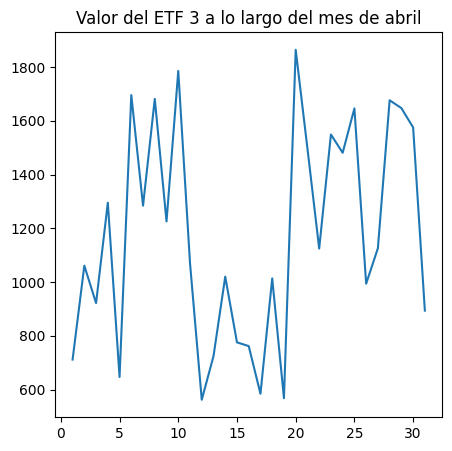

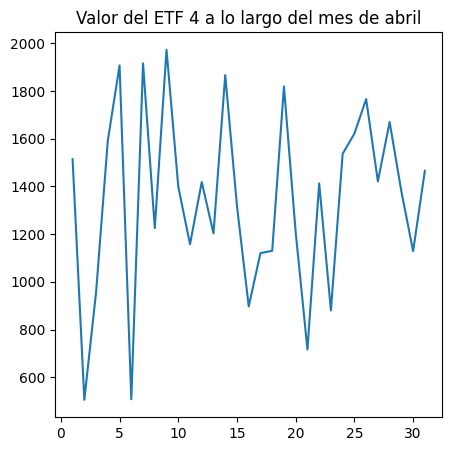

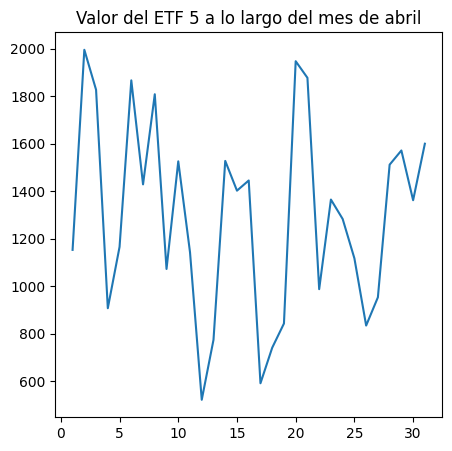

In [1]:
import random
import numpy as np

#Lógica de inversiones, se plantea una inversión al inicio de cada día durante el mes de abril.
#La inversión o retiro de cada día dependerá de la predicción del modelo referente a la tendencia del ETF al final de ese día.

#Se inicia el proceso un día antes del primer día de abril (fehca de inicio de la inversión).
#Se busca el estado actual de cada ETF para el 31 de marzo, una vez cerrada la bolsa.

#Se inicializan 31 valores para cada ETF, que representan el valor de cada ETF al final de cada día o al inicio del siguiente día.
#Para esta simulación representarían los valores de ETF al inicio de cada día del mes de abril.
ETFS=[[random.uniform(500, 2000) for _ in range(31)] for _ in range(5)]
#Gráfica de valores de cada ETF a lo largo del mes de abril.
import matplotlib.pyplot as plt
plt.figure(figsize=(5, 5))
plt.plot(range(1, 32), [ETFS[0][i] for i in range(31)], label='ETF 1')
plt.title('Valor del ETF 1 a lo largo del mes de abril')

plt.figure(figsize=(5, 5))
plt.plot(range(1, 32), [ETFS[1][i] for i in range(31)], label='ETF 2')
plt.title('Valor del ETF 2 a lo largo del mes de abril')

plt.figure(figsize=(5, 5))
plt.plot(range(1, 32), [ETFS[2][i] for i in range(31)], label='ETF 3')
plt.title('Valor del ETF 3 a lo largo del mes de abril')

plt.figure(figsize=(5, 5))
plt.plot(range(1, 32), [ETFS[3][i] for i in range(31)], label='ETF 4')
plt.title('Valor del ETF 4 a lo largo del mes de abril')

plt.figure(figsize=(5, 5))
plt.plot(range(1, 32), [ETFS[4][i] for i in range(31)], label='ETF 5')
plt.title('Valor del ETF 5 a lo largo del mes de abril')



In [ ]:
def money_to_action(money, actual_action_value):
    """
    Función que convierte el dinero a acciones.
    :param money: dinero a convertir
    :param actual_action_value: valor de la acción en ese momento
    :return: número de acciones redondeado a 4 decimales
    """
    return  round(money / actual_action_value, 4)


def action_to_money(actions, actual_action_value):
    """
    Función que convierte las acciones a dinero.
    :param actions: número de acciones
    :param actual_action_value: valor de la acción en ese momento
    :return: dinero redondeado a 2 decimales
    """
    return round(actions * actual_action_value, 2)


In [2]:
#Se inicia el proceso de inversión, sabiendo el cambio porcentual de cada ETF respecto al día anterior.
#Si el ETF presentó una disminución en su valor se retira una inversión equivalente al total de cartera sobre 1,5 veces el porcentaje 
# del cambio porcentual.
#actual invertido en la ETF. Si actualmente no se tiene acciones de la ETF, se inverte un 10% del total de la cartera en caso 
#de que el cambio porcentual sea practicamente nulo y un 1% del total de la cartera en caso de que el cambio porcentual sea menor que el -100%.

#Si el ETF presentó un aumento en su valor se invierte una cantidad equivalente 
# al porcentaje del cambio porcentual respecto al total actual en la cartera.
#Si actualmente no se tiene acciones en la ETF, se invierte un capital equivalente a 2 veces el 
# porcentaje del cambio porcentual respecto al total actual en la cartera.
#Si se predice un aumento de acciones del ETF sobrepasa el umbral del 40% (cambio porcentual), se invierte el capital equivalente a 2 veces 
# el porcentaje del cambio porcentual respecto al total actual en la cartera y se marca la ETF para el retiro del 75% de acciones al 
#del día siguiente. Si se predice este aumento y también se tenía previsto el retiro de acciones, en su lugar se 
#retira un 20% de acciones de la ETF, se deposita el capital equivalente al porcentaje del cambio porcentual respecto al total
#actual en la cartera y se marca la ETF para el retiro del 75% de acciones al inicio del día siguiente.

#Las inversiones que dependen del cambio porcentual tienen un máximo del 20% del total de la cartera actual para cuando el cambio porcentual es  positivo y
#un máximo del 5% del total de la cartera actual para cuando el cambio porcentual es negativo.
#Los retiros de acciones que estan bajando tiene un máximo del 90% del la acción actual en la ETF.

#El orden es importante, primero se retiran acciones de las ETF marcadas para el retiro, luego se 
#retiran acciones de las ETF que presentaron una disminución en su valor, luego se invierte
#en las ETF de mayor umbral y aquellas que presentaron un aumento en su valor.
#Y finalmente se invierte en las ETF cuyo valor disminuyó, pero esta inversión es pequeña.
def dia_bolsa(acciones_actuales, ETF_actual, ETF_pred, cartera_actual, retirar_acciones):
    umbral=0.4
    #Se calcula el cambio porcentual de cada ETF respecto al día anterior (31 de marzo).
    cambio_porcentual=[(ETF_pred[i]-ETF_actual[i])/ETF_actual[i] for i in range(len(ETF_actual))]
    print("Cambio porcentual de cada ETF respecto al día anterior:", cambio_porcentual)
    
    #Primero se retira el 75% de acciones de las ETF marcadas para el retiro y cuyo cambio_porcentual es menor que 0.2 (umbral para inversión masiva)
    for i in range(len(ETF_actual)):
        if retirar_acciones[i] and cambio_porcentual[i]<=umbral and acciones_actuales[i]>0:
            valor=acciones_actuales[i]*0.75
            acciones_actuales[i]-=valor
            cartera_actual+=valor
            print("Retiro del 75% de acciones de la ETF", i+1)
            print("Acciones actuales después del retiro:", acciones_actuales[i])
            print("Cartera actual después del retiro:", cartera_actual)
            retirar_acciones[i]=False
            
    #Retiro de ETF con umbral que sigue siendo alto
    for i in range(len(ETF_actual)):
        if cambio_porcentual[i]>umbral:
                if retirar_acciones[i]:
                    #Retiro del 20% de acciones de la ETF
                    valor=acciones_actuales[i]*0.2
                    acciones_actuales[i]-=valor
                    cartera_actual+=valor
                    print("Retiro del 20% de acciones de la ETF de umbral alto", i+1)
                    print("Cartera actual después del retiro:", cartera_actual)



    #Se realiza un retiro de inversiones de las ETF que presentaron una disminución en su valor
    for i in range(len(ETF_actual)):
        if cambio_porcentual[i]<0:
            if acciones_actuales[i]>0:
                valor=min(0.9,1.5*abs(cambio_porcentual[i]))*acciones_actuales[i]
                acciones_actuales[i]-=valor
                cartera_actual+=valor
                print("Retiro de acciones de la ETF", i+1)
                print("Cartera actual después del retiro:", cartera_actual)

                
    #Inversión en las ETF de mayor umbral 
    for i in range(len(ETF_actual)):
        if cambio_porcentual[i]>umbral:
                if retirar_acciones[i]:
                    #Inversión del capital equivalente al porcentaje del cambio porcentual respecto al total actual en la cartera
                    valor=min(abs(cambio_porcentual[i])*cartera_actual, cartera_actual*0.2)
                    acciones_actuales[i]+=valor
                    cartera_actual-=valor
                    retirar_acciones[i]=True
                    print("Inversión en la ETF de mayor umbral", i+1)
                    print("Cartera actual después de inversión:", cartera_actual)
                else:
                    valor=min(abs(cambio_porcentual[i])*cartera_actual*2, cartera_actual*0.2)
                    acciones_actuales[i]+=valor
                    cartera_actual-=valor
                    print("Inversión en la ETF con umbral alto", i+1)
                    print("Cartera actual después de la inversión:", cartera_actual)
                    retirar_acciones[i]=True

    #Inversion en las ETF de menor umbral y que presentaron un aumento en su valor.
    for i in range(len(ETF_actual)):
        if cambio_porcentual[i]>0:
            if cambio_porcentual[i]<=umbral:
                if acciones_actuales[i]>0:
                    valor=min(abs(cambio_porcentual[i])*cartera_actual, cartera_actual*0.2)
                    acciones_actuales[i]+=valor
                    cartera_actual-=valor
                    print("Inversión en la ETF con valor positivo", i+1)
                    print("Cartera actual después de la inversión:", cartera_actual)
                else:
                    valor=min(abs(cambio_porcentual[i])*cartera_actual*2, cartera_actual*0.2)
                    acciones_actuales[i]+=valor
                    cartera_actual-=valor
                    print("Inversión en la ETF con valor positivo", i+1)
                    print("Cartera actual después de la inversión:", cartera_actual)
                    print("Acciones actuales después de la inversión:", acciones_actuales[i])
    #Inversión en las ETF cuyo valor disminuyó, pero esta inversión es pequeña.
    for i in range(len(ETF_actual)):
        if cambio_porcentual[i]<0:
            if acciones_actuales[i]<=0:
                valor=cartera_actual*(0.1-0.09*abs(cambio_porcentual[i]))
                acciones_actuales[i]+=valor
                cartera_actual-=valor
                print("Inversión en la ETF con valor negativo", i+1)
                print("Cartera actual después de la inversión:", cartera_actual)
                
    
    print("Acciones actuales al final del día:", acciones_actuales)
    print("Cartera actual al final del día:", cartera_actual)
    return cartera_actual


In [3]:

#Simulación de la inversión a lo largo del mes de abril.
cartera_mensual=1000
cartera_actual=cartera_mensual
acciones_actuales=[0]*5
retirar_acciones=[False]*5
for i in range(1, 31):
    ETF_actual=[ETFS[j][i-1] for j in range(5)]
    ETF_pred=[ETFS[j][i] for j in range(5)]
    cartera_actual=dia_bolsa(acciones_actuales, ETF_actual, ETF_pred, cartera_actual, retirar_acciones)
    print(f"Día {i}:")
    print("Acciones actuales:", acciones_actuales)
    print("Cartera actual:", cartera_actual)
    print(sum(acciones_actuales)+cartera_actual)
    print("\n")
    

Cambio porcentual de cada ETF respecto al día anterior: [-0.49141103375260514, -0.10645359138319808, 0.4913849468348473, -0.6661582448822563, 0.7303858796290705]
Inversión en la ETF con umbral alto 3
Cartera actual después de la inversión: 800.0
Inversión en la ETF con umbral alto 5
Cartera actual después de la inversión: 640.0
Inversión en la ETF con valor negativo 1
Cartera actual después de la inversión: 604.30527554415
Inversión en la ETF con valor negativo 2
Cartera actual después de la inversión: 549.6644900083489
Inversión en la ETF con valor negativo 4
Cartera actual después de la inversión: 527.6527588819397
Acciones actuales al final del día: [35.69472445584995, 54.64078553580109, 200.0, 22.0117311264093, 160.0]
Cartera actual al final del día: 527.6527588819397
Día 1:
Acciones actuales: [35.69472445584995, 54.64078553580109, 200.0, 22.0117311264093, 160.0]
Cartera actual: 527.6527588819397
1000.0


Cambio porcentual de cada ETF respecto al día anterior: [0.9467178994785822, 

Conclusiones 

Las relaciones generadas a través del Feature Engineering fueron bastante útiles para mejorar el rendimiento del modelo. Se logró obtener un RMSE de 0.45, un R² de 0.61 y un MAE de 0.34, lo que indica una capacidad razonable del modelo para predecir los precios de AirBnB.

En cuanto al MSE, se observa una variación de 0.45 con respecto al precio base. Es importante recordar que la métrica inicial era un Log_price, lo que implica que la diferencia en escala logarítmica equivale aproximadamente a 2.81 unidades monetarias en base 10. Esta diferencia no es demasiado alta y sugiere que el modelo ofrece una buena aproximación para la predicción de precios.

Respecto al MAE, el valor de 0.34 indica que, en promedio, el error absoluto en la predicción del log-price es relativamente bajo, lo que refuerza la estabilidad del modelo. Aunque siempre hay margen de mejora, los resultados obtenidos reflejan que el enfoque aplicado fue efectivo y puede ser optimizado aún más con técnicas adicionales de selección de características y ajuste de hiperparámetros.

Aplicaciones y Mejoras Futuras

Las predicciones del modelo pueden utilizarse para ayudar a los anfitriones de AirBnB a fijar precios competitivos basados en características relevantes, como la ubicación, los servicios ofrecidos y la temporada. Además, se pueden integrar en herramientas de análisis de mercado que permitan evaluar tendencias de precios y maximizar ingresos, así como funcionalidades para sugerir precios en base a los datos que incluyan los anfitriones o recomendar tipos de viviendas para los clientes según un precio estimado o presupuesto.

Para mejorar la precisión del modelo, se podrían incorporar datos adicionales, como:

Tendencias temporales: Precios históricos en diferentes épocas del año para capturar estacionalidad. Eventos según la temporada en diferentes ubicaciones (carnaval de Brasil).
Reseñas y calificaciones: Factores cualitativos como la reputación del anfitrión y la satisfacción de los huéspedes. Se podría obtener analizando palabras claves de las reseñas.
Competencia en la zona: Número de alojamientos similares disponibles en un radio determinado.
Eventos locales: La demanda de hospedaje puede variar por conciertos, conferencias u otras actividades. Se podría obtener esta data haciendo web scrapping de una fecha especcífica de búsqueda de alojamiento